In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import copy 
import numpy as np

import download
import observatories
import analysis
import events
import data
import correlation
import reference
import const

%load_ext autoreload
%autoreload 2


In [2]:
january = analysis.loadData(2022,1)

In [16]:
days_checked = []
for i, day in enumerate(january):
    print(i + 1)
    e_list = events.EventList([])
    for peak in day:
        print("new peak: ", peak)
        obs = observatories.ObservatorySet(peak.stations)
        for o in obs.getSet():
            dp1, dp2, cor = analysis.calcPoint(2022, 1, peak.time_start.day, peak.time_start, o[0], o[1], mask_frq=True)
            e_list += cor.peaks
    days_checked.append(e_list)

1
new peak:  ['III', 01:27:56, 01:28:14, '0.6035']
2022_1_1_INDONESIA_Australia-ASSA_45_nobg_bintime_4_flatten_2000.png
[]
new peak:  ['III', 03:01:20, 03:01:39, '0.6006']
2022_1_1_INDONESIA_Australia-ASSA_45_nobg_bintime_4_flatten_2000.png
[]
new peak:  ['III', 03:25:42, 03:26:09, '0.6479']
2022_1_1_INDONESIA_Australia-ASSA_45_nobg_bintime_4_flatten_2000.png
[['III', 03:25:37, 03:25:52, '0.8083']]
new peak:  ['III', 03:28:06, 03:28:23, '0.6108']
2022_1_1_INDONESIA_Australia-ASSA_45_nobg_bintime_4_flatten_2000.png
[['III', 03:25:37, 03:25:52, '0.8083']]
new peak:  ['III', 04:45:48, 04:46:15, '0.6438']
2022_1_1_INDONESIA_Australia-ASSA_45_nobg_bintime_4_flatten_2000.png
[]
new peak:  ['III', 07:26:42, 07:27:17, '0.6358']
2022_1_1_Australia-ASSA_HUMAIN_45_nobg_bintime_4_flatten_2000.png
[]
new peak:  ['III', 12:35:26, 12:35:55, '0.6646']
2022_1_1_AUSTRIA-UNIGRAZ_HUMAIN_45_nobg_bintime_4_flatten_2000.png
[['III', 12:35:27, 12:35:58, '0.8107']]
new peak:  ['III', 12:56:27, 12:57:09, '0.649

TypeError: buffer is too small for requested array

In [3]:
peak = january[1][1]
print(peak, peak.stations)

['III', 07:00:45, 07:01:12, '0.7623'] [TRIEST, INDONESIA]


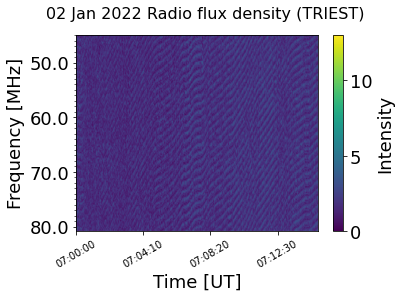

AttributeError: 'NoneType' object has no attribute 'peek'

In [17]:
op = data.createFromTime(peak.time_start.year, peak.time_start.month, peak.time_start.day, 
                         peak.time_start.__str__(), peak.stations[0], const.spectral_range)
oo = data.createFromTime(peak.time_start.year, peak.time_start.month, peak.time_start.day, 
                         peak.time_start.__str__(), peak.stations[1], const.spectral_range)

op.plot()
oo.plot() 

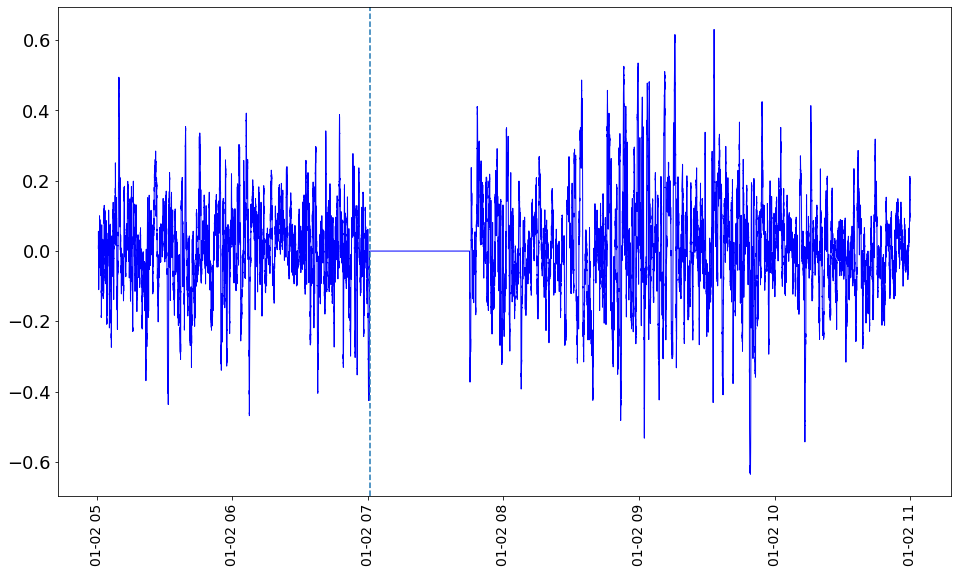

In [35]:
dp11 = data.createDay(peak.time_start.year, peak.time_start.month, peak.time_start.day, peak.stations[0], const.spectral_range)
dp21 = data.createDay(peak.time_start.year, peak.time_start.month, peak.time_start.day, peak.stations[1], const.spectral_range)
dp11, dp21 = data.fitTimeFrameDataSample(dp11, dp21)
cor1 = correlation.Correlation(dp1, dp2, peak.time_start.day)
cor1.calculatePeaks()
fig, ax = plt.subplots(figsize=(16,9))
cor1.plotCurve(ax, peaks=peak.time_start.__str__())
plt.show()

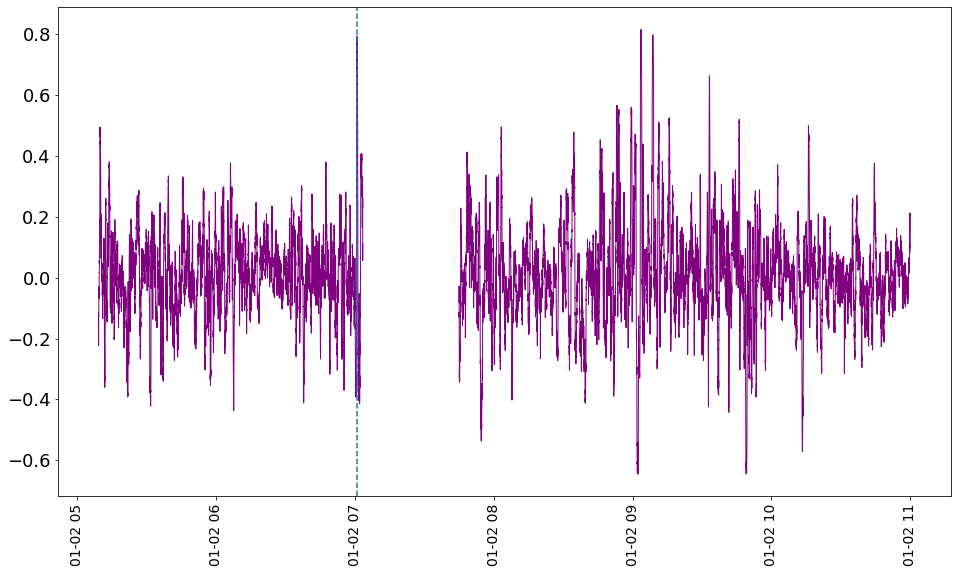

In [38]:
dp12 = data.createDay(peak.time_start.year, peak.time_start.month, peak.time_start.day, peak.stations[0], const.spectral_range)
dp22 = data.createDay(peak.time_start.year, peak.time_start.month, peak.time_start.day, peak.stations[1], const.spectral_range)
dp12, dp22 = data.fitTimeFrameDataSample(dp12, dp22)
cor2 = correlation.Correlation(dp1, dp2, peak.time_start.day, _flatten=True)
cor2.calculatePeaks()
fig, ax = plt.subplots(figsize=(16,9))
cor2.plotCurve(ax, peaks=peak.time_start.__str__())
plt.show()

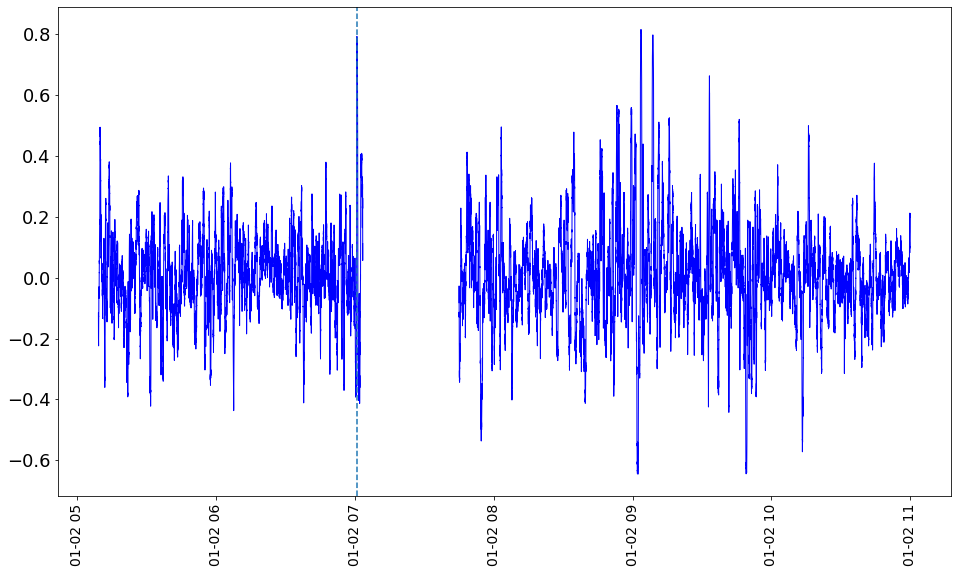

In [32]:
dp1 = data.createDay(peak.time_start.year, peak.time_start.month, peak.time_start.day, peak.stations[0], const.spectral_range)
dp2 = data.createDay(peak.time_start.year, peak.time_start.month, peak.time_start.day, peak.stations[1], const.spectral_range)
dp1, dp2 = data.fitTimeFrameDataSample(dp1, dp2)
cor = correlation.Correlation(dp1, dp2, peak.time_start.day, _no_background=True, _flatten=True)
cor.calculatePeaks()
fig, ax = plt.subplots(figsize=(16,9))
cor.plotCurve(ax, peaks=peak.time_start.__str__())
plt.show()

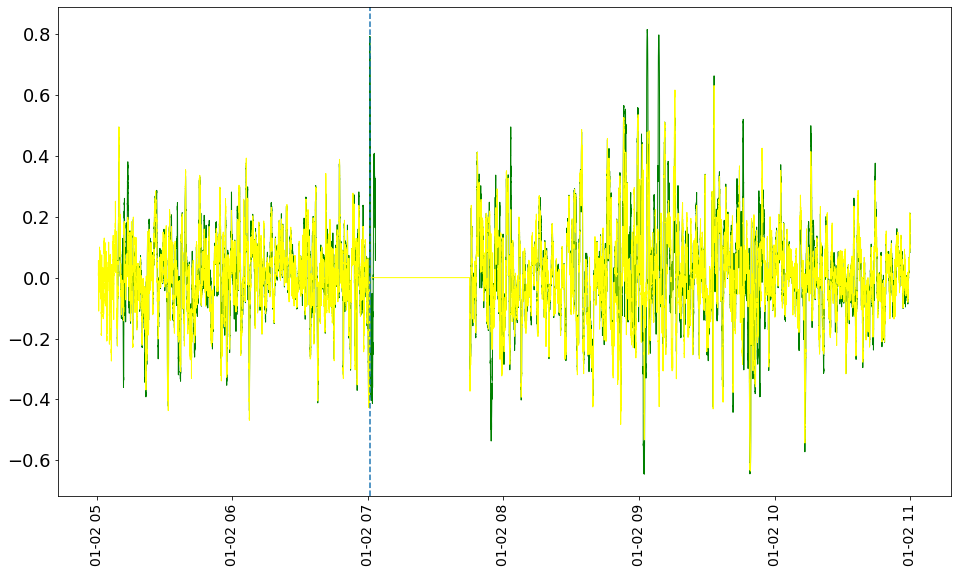

In [34]:
dp11 = data.createDay(peak.time_start.year, peak.time_start.month, peak.time_start.day, peak.stations[0], const.spectral_range)
dp21 = data.createDay(peak.time_start.year, peak.time_start.month, peak.time_start.day, peak.stations[1], const.spectral_range)
dp11, dp21 = data.fitTimeFrameDataSample(dp11, dp21)
cor1 = correlation.Correlation(dp1, dp2, peak.time_start.day)
cor1.calculatePeaks()
fig, ax = plt.subplots(figsize=(16,9))
cor.plotCurve(ax)
cor1.plotCurve(ax, peaks=peak.time_start.__str__())
plt.show()

In [5]:
import os
f = os.listdir(const.pathDataDay(2022,1,2))
g = [i for i in f if i.startswith(peak.stations[1].name)]

In [6]:
for i in g:
    print(i)
    j = data.DataPoint(const.pathDataDay(2022,1,2) + i)

INDONESIA_20220102_000000_59.fit.gz
INDONESIA_20220102_001500_59.fit.gz
INDONESIA_20220102_003000_59.fit.gz
INDONESIA_20220102_004500_59.fit.gz
INDONESIA_20220102_010000_59.fit.gz
INDONESIA_20220102_011500_59.fit.gz
INDONESIA_20220102_013000_59.fit.gz
INDONESIA_20220102_014500_59.fit.gz
INDONESIA_20220102_020000_59.fit.gz
INDONESIA_20220102_021500_59.fit.gz
INDONESIA_20220102_023000_59.fit.gz
INDONESIA_20220102_024500_59.fit.gz
INDONESIA_20220102_030000_59.fit.gz
INDONESIA_20220102_031500_59.fit.gz
INDONESIA_20220102_033000_59.fit.gz
INDONESIA_20220102_034500_59.fit.gz
INDONESIA_20220102_040000_59.fit.gz
INDONESIA_20220102_041500_59.fit.gz
INDONESIA_20220102_043000_59.fit.gz
INDONESIA_20220102_044500_59.fit.gz
INDONESIA_20220102_045959_59.fit.gz
INDONESIA_20220102_051500_59.fit.gz
INDONESIA_20220102_053000_59.fit.gz
INDONESIA_20220102_054459_59.fit.gz
INDONESIA_20220102_060000_59.fit.gz
INDONESIA_20220102_061500_59.fit.gz
INDONESIA_20220102_063000_59.fit.gz
INDONESIA_20220102_064500_59

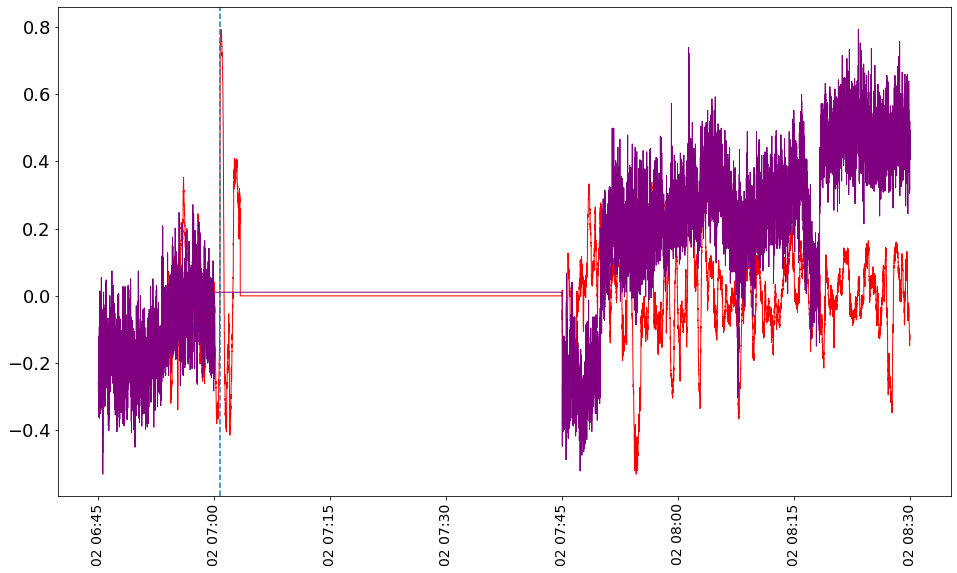

In [7]:
gg_ = g[int(len(g)/1.7):int(len(g)/1.4)]
gg__ = [data.DataPoint(const.pathDataDay(2022,1,2) + i) for i in gg_]
gg = [i for i in gg__ if i]
dp22 = data.createDay(peak.time_start.year, peak.time_start.month, peak.time_start.day, peak.stations[0], const.spectral_range)
gg1, dp22 = data.fitTimeFrameDataSample(gg, dp22)
gg1.createSummedCurve(const.spectral_range)
dp22.createSummedCurve(const.spectral_range)
corg = correlation.Correlation(gg1, dp22, peak.time_start.day, _flatten=True)
corg.calculatePeaks()
fig, ax = plt.subplots(figsize=(16,9))
corg.plotCurve(ax, peaks=peak.time_start.__str__())
gg1.plotSummedCurve(ax)
#dp22.plotSummedCurve(ax)
plt.show()

In [17]:
fgh = copy.copy(gg1)
for i in range(int(len(fgh.summedCurve)/3600)):
    print(i)
    if not np.nanstd(fgh.summedCurve[3600*i:3600*(i+1)]):
        for j in range(3600*i,3600*(i+1)):
            fgh.summedCurve[j] = np.nan


0
1
2
3
4
5
6


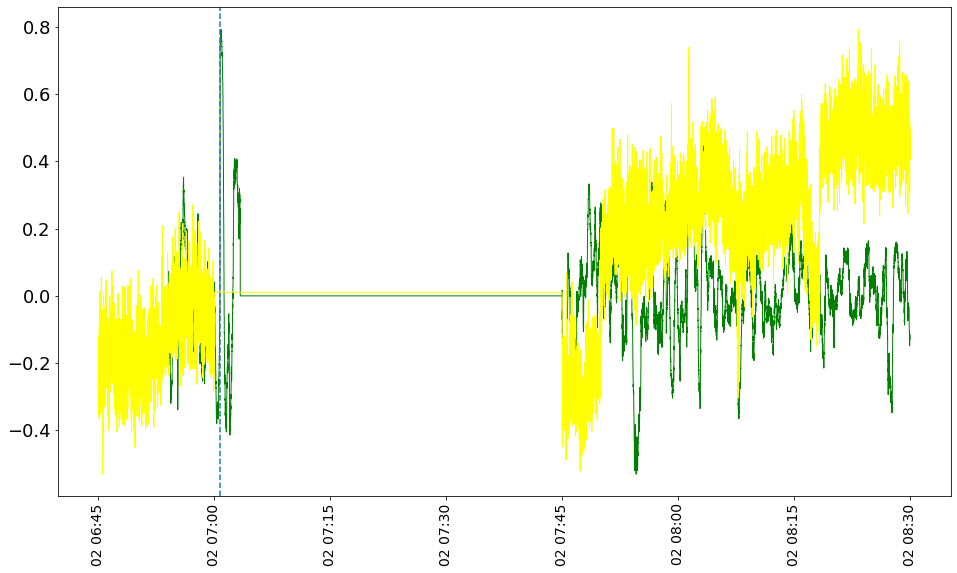

In [18]:
fgh.createSummedCurve(const.spectral_range)
dp22.createSummedCurve(const.spectral_range)
corg = correlation.Correlation(fgh, dp22, peak.time_start.day, _flatten=True)
corg.calculatePeaks()
fig, ax = plt.subplots(figsize=(16,9))
corg.plotCurve(ax, peaks=peak.time_start.__str__())
fgh.plotSummedCurve(ax)
#dp22.plotSummedCurve(ax)
plt.show()

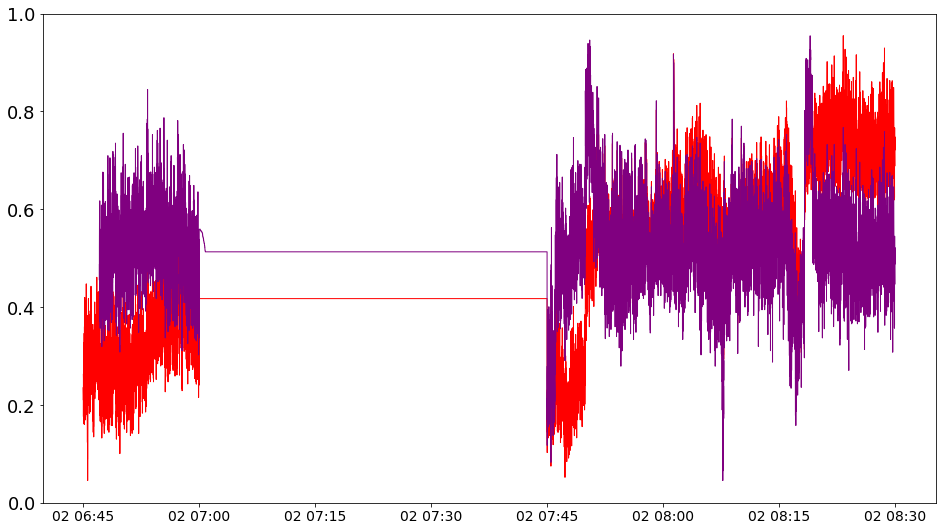

In [83]:
gg_ = g[int(len(g)/1.7):int(len(g)/1.4)]
gg__ = [data.DataPoint(const.pathDataDay(2022,1,2) + i) for i in gg_]
gg = [i for i in gg__ if i]
dp22 = data.createDay(peak.time_start.year, peak.time_start.month, peak.time_start.day, peak.stations[0], const.spectral_range)
gg1, dp22 = data.fitTimeFrameDataSample(gg, dp22)
gg1.createSummedCurve(const.spectral_range)


fig, ax = plt.subplots(figsize=(16,9))
gg1.plotSummedCurve(ax)

gg1.flattenSummedCurve(rolling_window=500)
gg1.plotSummedCurve(ax)
#dp22.plotSummedCurve(ax)
plt.show()

In [49]:
from astropy.io import fits
a = fits.open(const.pathDataDay(2022,1,2) + i)

In [52]:
a[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 3600 / length of data axis 1                          
NAXIS2  =                  200 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
DATE    = '2022-01-02'         / Time of observation                            
CONTENT = '2022/01/02  Radio flux density, e-CALLISTO (INDONESIA)' / Title of im
ORIGIN  = 'Sumedang'        

In [53]:
a[0].data

TypeError: buffer is too small for requested array

In [18]:
obs = observatories.ObservatorySet(peak.stations)
for o in obs.getSet():
    dp1, dp2, cor = analysis.calcPoint(2022, 1, peak.time_start.day, peak.time_start, o[0], o[1], mask_frq=True)
    print(cor.peaks)

AttributeError: 'NoneType' object has no attribute 'start'